In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [227]:
data = pd.read_csv("insurance.csv")

In [228]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Basic Check :- Data Insights :-

In [229]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Insights :- Numerical Column Insights

## Insights from Age Column:-
  - We can see that average age of patients is 39 with standard deviation of 14.04
  - Maximum age of Patient is 64
  - Range is from 18 to 64 mainly older patients are seen more.

## Insights from BMI Column:-
 - We can see that average bmi of patient is 30 with std devn of 1.20
 - Individuals with 1 child (the median) are typically charged around $9,382.
 - std devn of bmi is 6.09
 - bmi ranges from 15.96 to 53.13

## Insights from Children Column:-
 - Mostly 1 or 2 children is coming as a patient

## Insights from Charges column is :-
 - Minimum charges paid by Patient is $1121
 - Average Charges paid by Patient is 13270 with std devn of 12110

In [230]:
data.describe(include = 'O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Insights :- Categorical Column Insights

## Insights from Sex :-
  - There are total **1338 patients**
  - **Mostly Male Patients** are there
  - **676 Male patients** are there

## Insights from Smoker :-
  - Mostly **Non-smoker patients** are there
  - Out of **1338**, **1064** Patients are **Non-Smoker**

## Insights from Region :- 
  - Mostly Patients are from **Southeast region**
  - There are **364 patients from SouthEast Region**
  - There are **4 different Regions**

## Checking for outliers :-

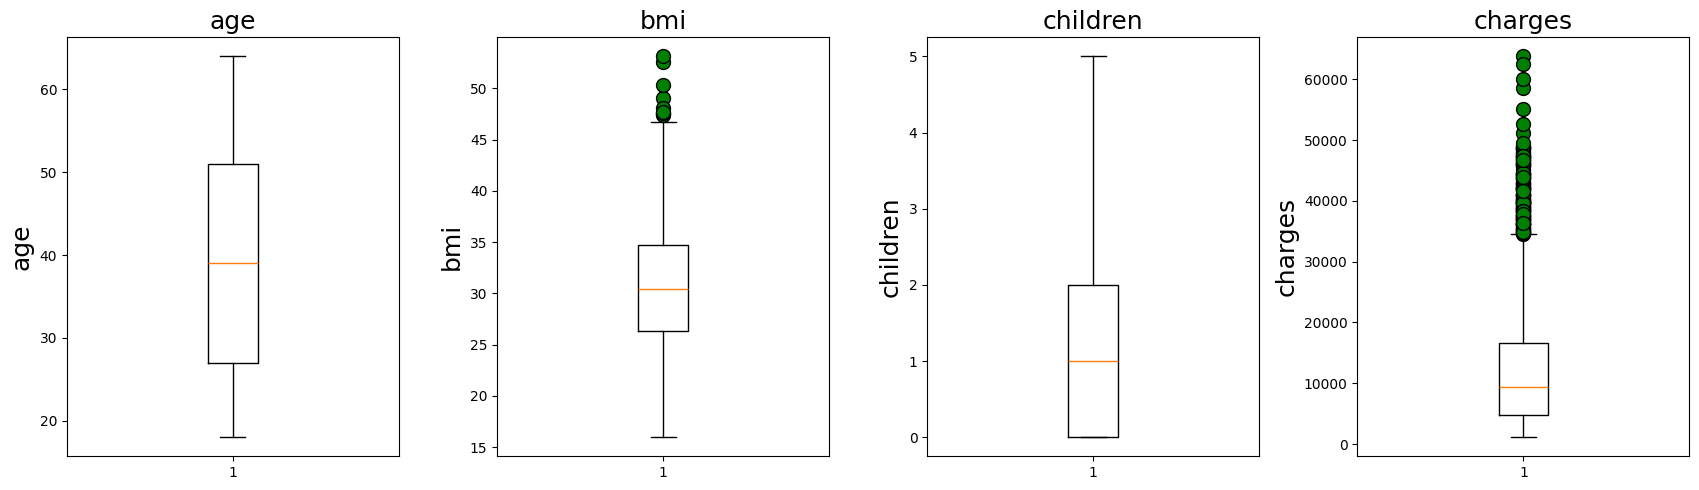

In [231]:
plt.figure(figsize=(30, 5))
plot_num = 1
flierprops = dict(marker='o', markerfacecolor='green', markersize=10)

for i in data.select_dtypes(include='number'):
    if plot_num <= 7:
        plt.subplot(1, 7, plot_num)
        plt.boxplot(data[i], flierprops=flierprops)
        plt.title(i, fontsize=18)
        plt.ylabel(i, fontsize=18)
        plot_num += 1

plt.tight_layout()
plt.show()

In [232]:
# We can see that Outliers are present in BMI & Charges

# BMI

In [233]:
q1 = data['bmi'].quantile(0.25)
q2 = data['bmi'].quantile(0.50)
q3 = data['bmi'].quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr

print(q1)
print(q2)
print(q3)
print(iqr)
print(lb)
print(ub)

26.29625
30.4
34.69375
8.3975
13.7
47.290000000000006


In [234]:
# len(data.loc[data['bmi']>ub,"bmi"])/len(data)

In [235]:
# data.loc[data['bmi']>ub,"bmi"] = data["bmi"].median()

In [236]:
# data.loc[data['bmi']>ub,"bmi"]

In [237]:
# data.loc[data['bmi']<lb,"bmi"]

# Charges :- 

In [238]:
q1 = data['charges'].quantile(0.25)
q2 = data['charges'].quantile(0.50)
q3 = data['charges'].quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr

print(q1)
print(q2)
print(q3)
print(iqr)
print(lb)
print(ub)

4740.28715
9382.033
16639.912515
11899.625365
-13109.1508975
34489.350562499996


In [239]:
# len(data.loc[data['charges']>ub,"charges"])/len(data)

# EDA :-

## Univariate Analysis :-

In [240]:
for i in data:
    print(i)

age
sex
bmi
children
smoker
region
charges


<Axes: xlabel='age', ylabel='Count'>

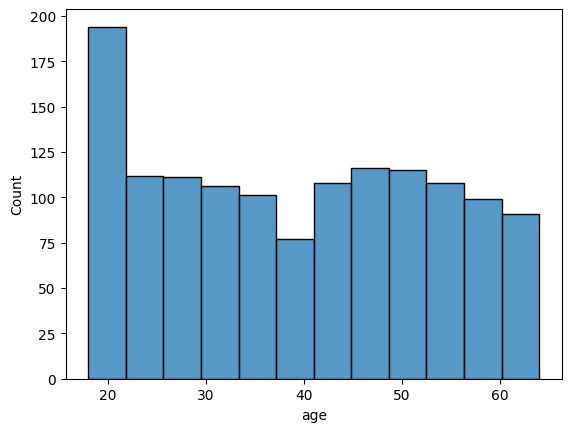

In [241]:
sns.histplot(x = data['age'])

<Axes: xlabel='bmi', ylabel='Count'>

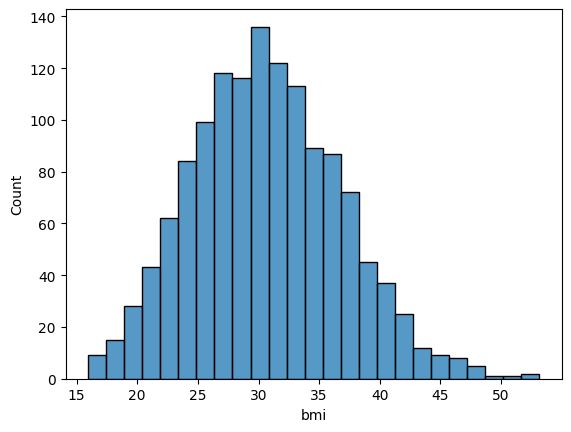

In [242]:
sns.histplot(x = data['bmi'])

<Axes: xlabel='charges', ylabel='Count'>

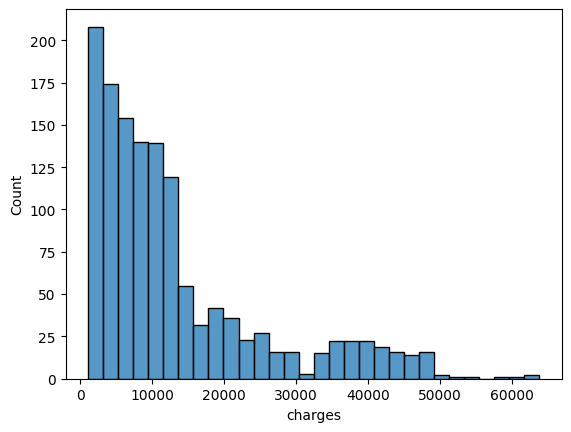

In [243]:
sns.histplot(x = data['charges'])

## Bivariate Analysis :-

<Axes: xlabel='smoker', ylabel='charges'>

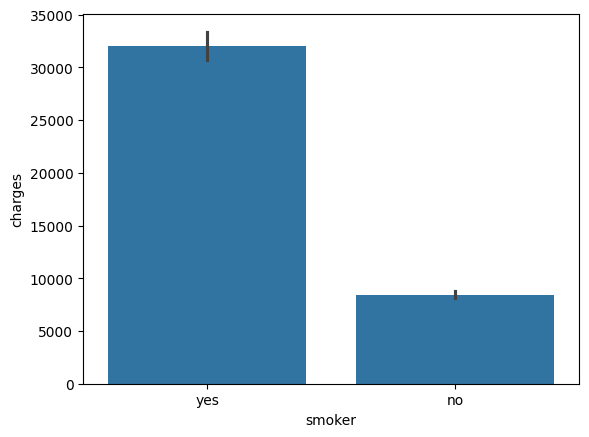

In [244]:
sns.barplot(x='smoker', y='charges', data=data)

<Axes: xlabel='sex', ylabel='charges'>

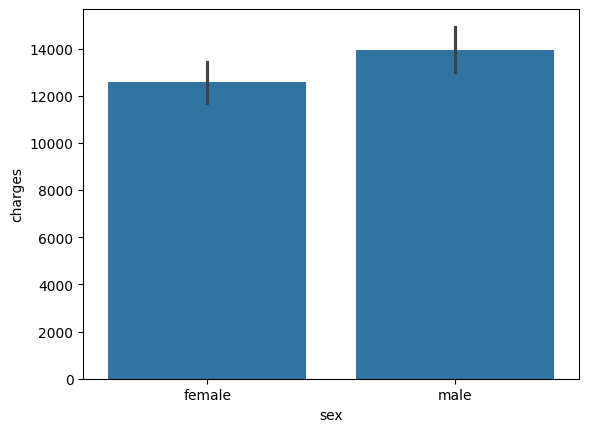

In [245]:
sns.barplot(x = 'sex', y = 'charges', data = data)

<Axes: xlabel='region', ylabel='count'>

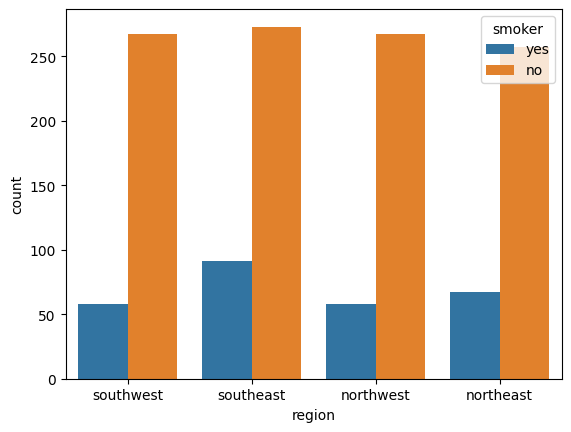

In [246]:
sns.countplot(x = 'region', hue ='smoker', data = data)

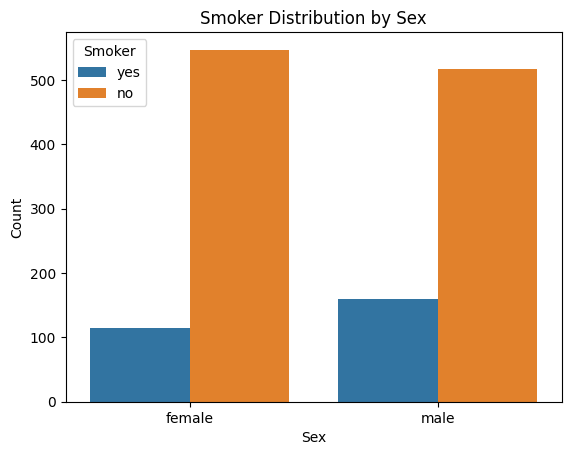

In [247]:
sns.countplot(x='sex', hue='smoker', data=data)
plt.title('Smoker Distribution by Sex')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.legend(title='Smoker')
plt.show()

## MultiVariate Analysis :-

# Data PreProcessing :-

In [248]:
# Encoding :-

In [249]:
# LabelEncoder - sex, smoker
# OHE - region

In [250]:
# Applying Label Encoding on Sex & Smoker

In [251]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [252]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [253]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [254]:
# Applying One hot Encoding using get dummies on region column

In [255]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [256]:
data = pd.get_dummies(data, columns=['region'], drop_first=False,dtype=int)

In [257]:
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


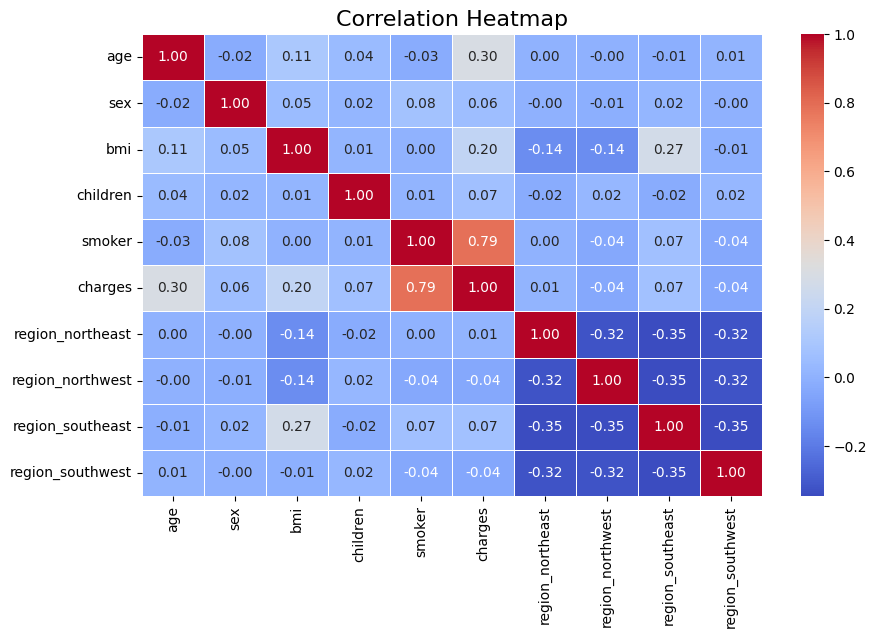

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate correlation
corr = data.corr()

# 2. Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [259]:
# Let's do scaling : -MinMax or std Scaling on bmi & charges

In [260]:
data['bmi'].value_counts() # Continous

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

In [261]:
data['charges'].value_counts() # Continous

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

## Understand the things perfectly now

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [263]:
x = data[['age', 'bmi', 'smoker', 'region_southeast', 'region_northeast','children','sex','region_northwest']]
y = data['charges']

In [264]:
x

,age,bmi,smoker,region_southeast,region_northeast,children,sex,region_northwest
0,19,27.900,1,0,0,0,0,0
1,18,33.770,0,1,0,1,1,0
2,28,33.000,0,1,0,3,1,0
3,33,22.705,0,0,0,0,1,1
4,32,28.880,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,0,0,0,3,1,1
1334,18,31.920,0,0,1,0,0,0
1335,18,36.850,0,1,0,0,0,0
1336,21,25.800,0,0,0,0,0,0


In [265]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [266]:
y_log = np.log1p(y)

In [267]:
x_train, x_test, y_train_log, y_test_log = train_test_split(x, y_log, test_size=0.2, random_state=42)

# Apply Standard Scaling on x Train & x_Test

In [268]:
scaler = StandardScaler()

In [269]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Building :-

In [270]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(
    n_estimators = 200,
    max_depth = 6,
    min_samples_split = 2,
    random_state = 42
)

In [271]:
rfr.fit(x_train_scaled,y_train_log)

RandomForestRegressor(max_depth=6, n_estimators=200, random_state=42)

In [272]:
# Time to Predict :-

In [273]:
y_pred = rfr.predict(x_test_scaled)

In [274]:
y_pred

array([ 9.12464656,  8.55169805, 10.21332246,  9.14942192, 10.4575022 ,
        8.71765023,  7.58187094,  9.54517325,  8.58119389,  9.26308273,
        9.88943436,  8.8805469 ,  8.46969183, 10.70854671, 10.76456666,
       10.6982805 ,  9.24818855, 10.67559659,  9.14025825, 10.11954673,
        8.52806023,  9.11308221,  7.40538749,  7.89671387,  9.3215286 ,
        9.39341779,  9.53238953,  8.51179435,  9.25968867,  7.40380861,
        8.9213922 ,  9.39652275,  7.77102271,  8.63340915,  8.27322863,
        9.16720729,  7.84989217,  9.01925585, 10.07865229, 10.60812393,
        8.39294721,  7.88529716,  9.40405859,  9.56134673,  8.70129469,
        9.62696052,  9.19291592,  8.49647294, 10.64518284,  8.55334609,
        9.55061244,  7.66199628,  8.79938398,  7.53587126,  9.40678448,
        9.28413718,  8.10194045, 10.6769807 ,  9.40016714,  9.35945556,
        9.54226479,  8.54786338,  9.69691669,  8.88043866,  9.30759911,
        8.46081841,  9.83542594,  9.39900694,  8.42049538,  7.63

In [275]:
y_test_log

764      9.115598
887      8.570388
890     10.286434
1293     9.138081
259     10.426774
          ...    
109     10.759105
575      9.411148
535      8.710805
543     11.063061
846      9.197630
Name: charges, Length: 268, dtype: float64

## Evaluation Begins :-

In [276]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [277]:
# Testing Accuracy :-

In [278]:
r2_score(y_test_log, y_pred)

0.8617833846736251

In [279]:
# Training Accuracy :-

In [280]:
train_pred = rfr.predict(x_train_scaled)

In [281]:
train_pred

array([ 9.11714461,  9.23199013,  9.3565962 , ...,  9.40286468,
       10.68631939,  9.38586937])

In [282]:
y_train_log

560      9.126398
1285     9.052009
1142    10.207990
969      9.059265
486      9.431590
          ...    
1095     8.425558
1130     9.057574
1294     9.386990
860     10.738883
1126     9.231675
Name: charges, Length: 1070, dtype: float64

In [283]:
r2_score(y_train_log, train_pred)

0.8824227928389958

In [284]:
#Check if some features are noisy or irrelevant:

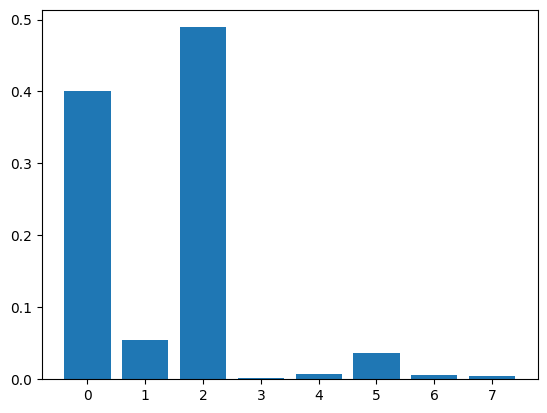

In [285]:
import matplotlib.pyplot as plt

importances = rfr.feature_importances_
plt.bar(range(len(importances)), importances)
plt.show()

## Cross Validation Score :- 

In [286]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create the model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation (let's use 5 folds)
scores = cross_val_score(rfr, x_train_scaled, y_train_log, cv=5, scoring='r2')

# Print each fold's score
print("Cross-validation scores (R²):", scores)

# Mean and standard deviation
print("Mean CV R²:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-validation scores (R²): [0.77236405 0.88955928 0.76628628 0.78317311 0.81640167]
Mean CV R²: 0.8055568779305965
Standard Deviation: 0.045429042283804774


## HyperParameter or Fine Tuning :-

In [287]:
from sklearn.model_selection import GridSearchCV

In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 6, 8, 12],
    'min_samples_split': [2, 5, 8]
}

model = RandomForestRegressor(random_state=42)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid.fit(x_train_scaled, y_train_log)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best parameters: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.8216738446889217
